In [1]:
# 卷积
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
from PIL import Image

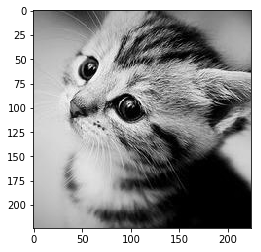

In [2]:
im = Image.open("./cat.png").convert('L')
im = np.array(im,dtype="float32")
plt.imshow(im.astype('uint8'), cmap='gray')

In [3]:
im = torch.from_numpy(im.reshape((1, 1, im.shape[0], im.shape[1])))

In [4]:
im.size()

torch.Size([1, 1, 224, 224])

In [14]:
#sobel边缘检测
conv1 = nn.Conv2d(1,1,3,bias = False)
sobel_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],dtype='float32')
sobel_kernel = sobel_kernel.reshape((1,1,3,3))
conv1.weight.data = torch.from_numpy(sobel_kernel)
edge1 = conv1(Variable(im))
edge1 = edge1.data.squeeze().numpy()
edge1

array([[ 3.,  2., -5., ..., -3., -3., -6.],
       [ 6.,  4.,  5., ...,  3.,  3., -1.],
       [ 6.,  2.,  1., ...,  0.,  0., -4.],
       ...,
       [ 1., -1., -4., ...,  0.,  0.,  0.],
       [-1., -3.,  3., ...,  0.,  0.,  0.],
       [-4.,  2., -1., ...,  0.,  0.,  0.]], dtype=float32)

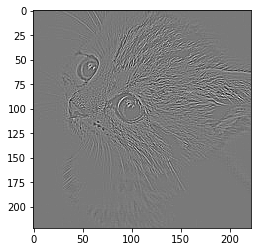

In [15]:
plt.imshow(edge1,cmap='gray')

In [17]:
# 池化
pool1 = nn.MaxPool2d(2, 2)
print('before max pool, image shape: {} x {}'.format(im.shape[2], im.shape[3]))
small_im1 = pool1(Variable(im))
small_im1 = small_im1.data.squeeze().numpy()
print('after max pool, image shape: {} x {} '.format(small_im1.shape[0], small_im1.shape[1]))

before max pool, image shape: 224 x 224
after max pool, image shape: 112 x 112 


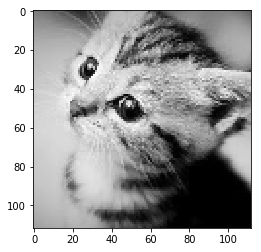

In [18]:
plt.imshow(small_im1,cmap='gray')